In [6]:
import sqlite3

In [132]:
import pandas as pd
df = pd.read_csv('data/VDB_16S_dataset.txt',sep="\t")
df_meta = pd.read_csv('data/VDB_16S_metadata.txt',sep="\t")

df_meta.head()

SampleID  Gender Floor Building         Surface
0   EKCM2.489495    Male     C   Ekeley        Door out
1   EKBM8.489473    Male     B   Ekeley  Faucet handles
2   EKCF4.489498  Female     C   Ekeley       Stall out
3   PTBM9.489505    Male     B   Porter  Soap dispenser
4  EKBF10.489552  Female     B   Ekeley      Sink floor

In [8]:
df.head()

#OTU ID  EKCM2.489495  EKBM8.489473  EKCF4.489498  PTBM9.489505  \
0   469478           3.0           5.0           7.0           3.0   
1   208196           0.0           0.0           0.0           0.0   
2   378462           0.0           0.0           0.0           0.0   
3   265971           0.0           0.0           0.0           0.0   
4   570812           0.0           0.0           0.0           0.0   

   EKBF10.489552  PTAM4.489517  EKCM1.489478  EKAM4.489564  EKCM7.489464  ...  \
0            0.0           0.0           0.0           0.0           0.0  ...   
1            1.0           0.0           0.0           0.0           0.0  ...   
2            0.0           2.0           2.0           8.0           2.0  ...   
3            1.0           0.0           0.0           0.0           0.0  ...   
4            0.0           0.0           0.0           0.0           2.0  ...   

   PTCF8.489486  EKCM9.489514  PTBF4.489483  PTBF1.489562  B6.489449  \
0           0.0           0.0           0.0           0.0        0.0   
1           0.0           0.0           0.0           0.0        0.0   
2           0.0           0.0           0.0           0.0        0.0   
3           0.0           0.0           0.0           0.0        0.0   
4           0.0           0.0           0.0           0.0        0.0   

   B5.489455  B1.489537  B3.489528  B2.489526  \
0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0   

                                    ConsensusLineage  
0  k__Bacteria; p__Firmicutes; c__Clostridia; o__...  
1  k__Bacteria; p__Proteobacteria; c__Alphaproteo...  
2  k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...  
3  k__Bacteria; p__Actinobacteria; c__Actinobacte...  
4  k__Bacteria; p__Proteobacteria; c__Alphaproteo...  

[5 rows x 111 columns]

In [9]:
path = "./db/metagenomics.sqlite"

In [10]:
#Create heatmap
con = sqlite3.connect(path)
cur = con.cursor()
command = f"""
    SELECT c.abs_count, s.building, s.surface
    FROM Samples s NATURAL JOIN Counts c
"""
res = cur.execute(command)
result = res.fetchall()
con.commit()
con.close()
result

[(0, 'ekeley', 'water'),
 (0, 'ekeley', 'water'),
 (0, 'ekeley', 'water'),
 (0, 'porter', 'water'),
 (0, 'porter', 'water'),
 (0, 'ekeley', 'door in'),
 (0, 'ekeley', 'sink floor'),
 (0, 'ekeley', 'door out'),
 (0, 'ekeley', 'stall in'),
 (0, 'ekeley', 'stall out'),
 (0, 'ekeley', 'toilet seat'),
 (0, 'ekeley', 'toilet flush handle'),
 (0, 'ekeley', 'toilet floor'),
 (0, 'ekeley', 'faucet handles'),
 (0, 'ekeley', 'soap dispenser'),
 (6, 'ekeley', 'door in'),
 (0, 'ekeley', 'sink floor'),
 (0, 'ekeley', 'stall out'),
 (0, 'ekeley', 'toilet seat'),
 (0, 'ekeley', 'toilet flush handle'),
 (1, 'ekeley', 'toilet floor'),
 (0, 'ekeley', 'faucet handles'),
 (0, 'ekeley', 'door in'),
 (0, 'ekeley', 'sink floor'),
 (0, 'ekeley', 'door out'),
 (0, 'ekeley', 'stall out'),
 (0, 'ekeley', 'toilet seat'),
 (0, 'ekeley', 'toilet floor'),
 (0, 'ekeley', 'faucet handles'),
 (0, 'ekeley', 'soap dispenser'),
 (0, 'ekeley', 'sink floor'),
 (0, 'ekeley', 'door out'),
 (0, 'ekeley', 'stall in'),
 (0, 'ekel

In [11]:
dict_elem = {}
for item in result :
    name = item[1]+'_'+item[2]
    if name not in dict_elem.keys() :
        dict_elem[name] = float(item[0])
    else :
        dict_elem[name] += float(item[0])

dict_elem

{'ekeley_water': 7888.0,
 'porter_water': 7781.0,
 'ekeley_door in': 20288.0,
 'ekeley_sink floor': 20046.0,
 'ekeley_door out': 17045.0,
 'ekeley_stall in': 7406.0,
 'ekeley_stall out': 22556.0,
 'ekeley_toilet seat': 21316.0,
 'ekeley_toilet flush handle': 18246.0,
 'ekeley_toilet floor': 22367.0,
 'ekeley_faucet handles': 26476.0,
 'ekeley_soap dispenser': 12367.0,
 'porter_door in': 8378.0,
 'porter_sink floor': 13961.0,
 'porter_door out': 15027.0,
 'porter_toilet seat': 14566.0,
 'porter_toilet flush handle': 13416.0,
 'porter_toilet floor': 14821.0,
 'porter_faucet handles': 15776.0,
 'porter_soap dispenser': 16800.0,
 'porter_stall in': 8004.0,
 'porter_stall out': 8386.0}

In [12]:
dict_city = {}
for item in result :
    name = item[1]
    if name not in dict_city.keys():
        dict_city[name] = float(item[0])
    else :
        dict_city[name] += float(item[0])

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dict_fin = dict(sorted(dict_elem.items(), key=lambda x:x[1]))
dict_fin

{'ekeley_stall in': 7406.0,
 'porter_water': 7781.0,
 'ekeley_water': 7888.0,
 'porter_stall in': 8004.0,
 'porter_door in': 8378.0,
 'porter_stall out': 8386.0,
 'ekeley_soap dispenser': 12367.0,
 'porter_toilet flush handle': 13416.0,
 'porter_sink floor': 13961.0,
 'porter_toilet seat': 14566.0,
 'porter_toilet floor': 14821.0,
 'porter_door out': 15027.0,
 'porter_faucet handles': 15776.0,
 'porter_soap dispenser': 16800.0,
 'ekeley_door out': 17045.0,
 'ekeley_toilet flush handle': 18246.0,
 'ekeley_sink floor': 20046.0,
 'ekeley_door in': 20288.0,
 'ekeley_toilet seat': 21316.0,
 'ekeley_toilet floor': 22367.0,
 'ekeley_stall out': 22556.0,
 'ekeley_faucet handles': 26476.0}

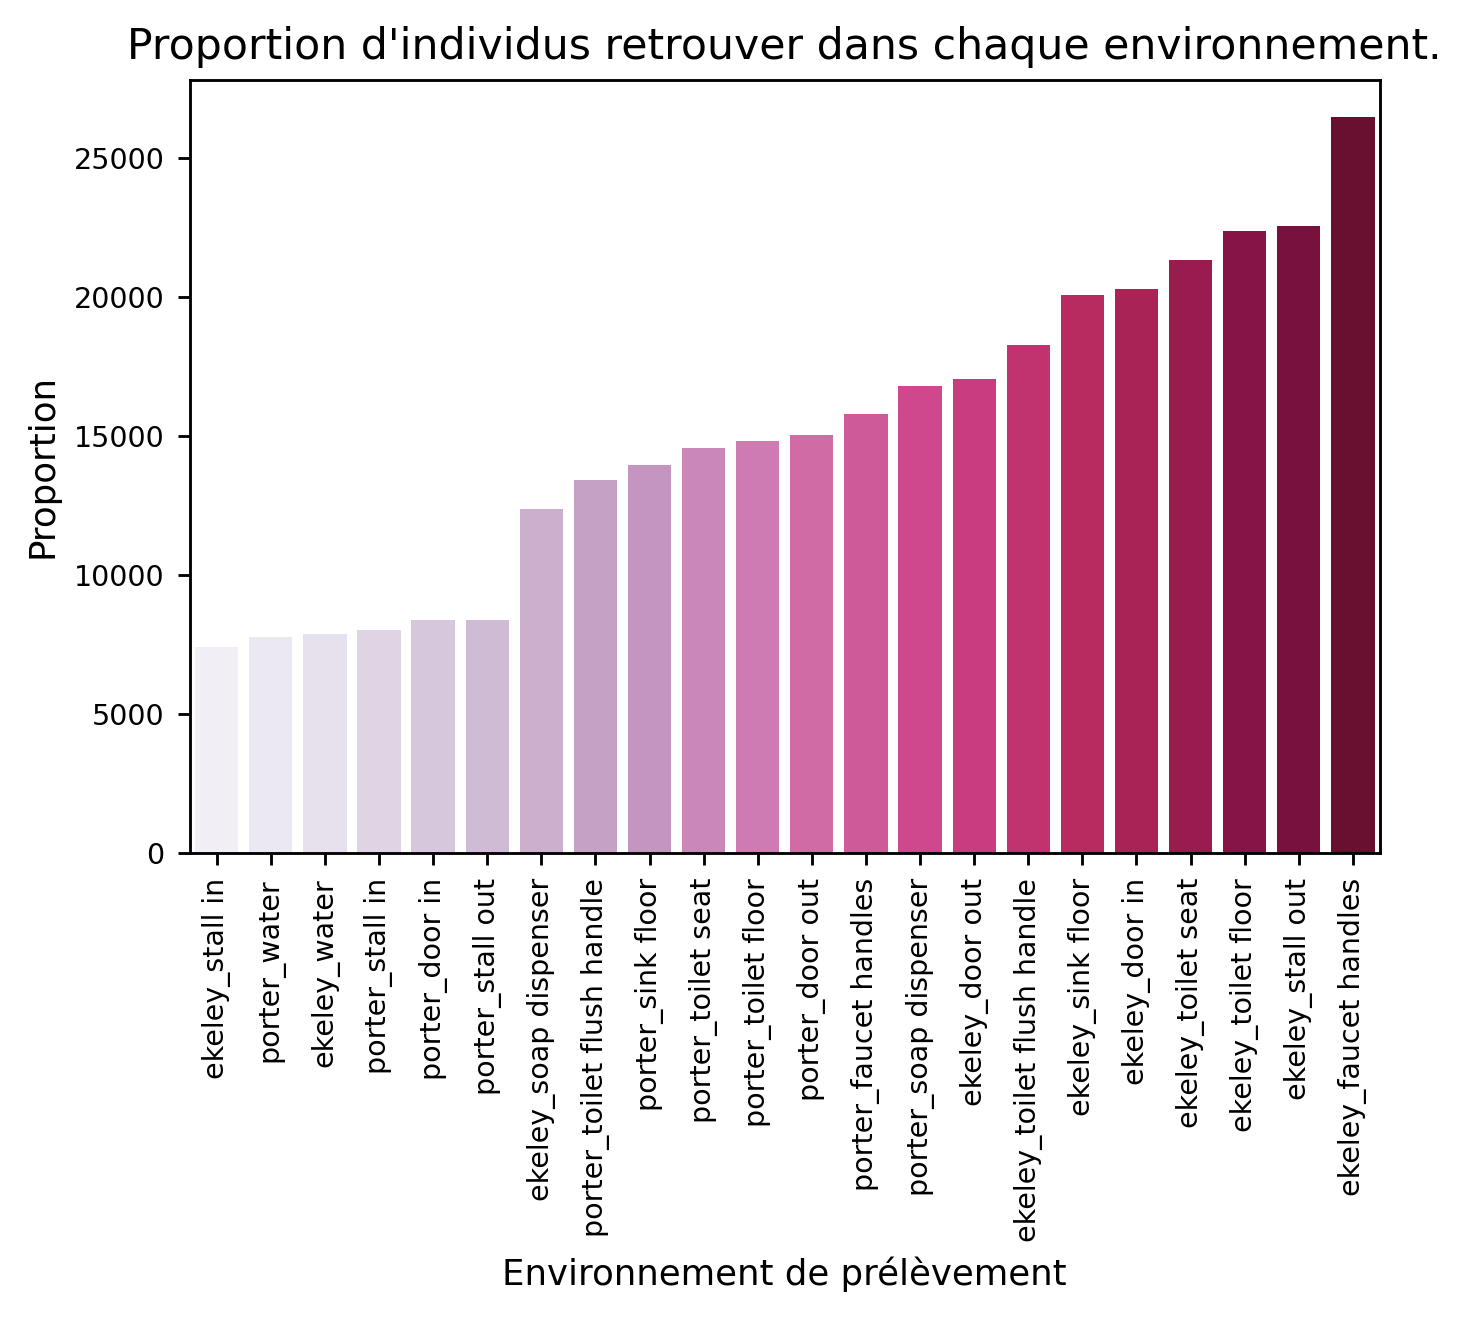

In [85]:
b = sns.barplot(x=list(dict_fin.keys()),y=list(dict_fin.values()),palette='PuRd')
plt.rcParams['figure.dpi']=226
b.set_xlabel("Environnement de prélèvement",fontsize=10)
b.set_ylabel("Proportion",fontsize=10)
plt.xticks(rotation=90)
b.tick_params(labelsize=8)
title = "Proportion d'individus retrouver dans chaque environnement."
plt.title(title)
plt.rcParams['figure.dpi']=226
plt.show()

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

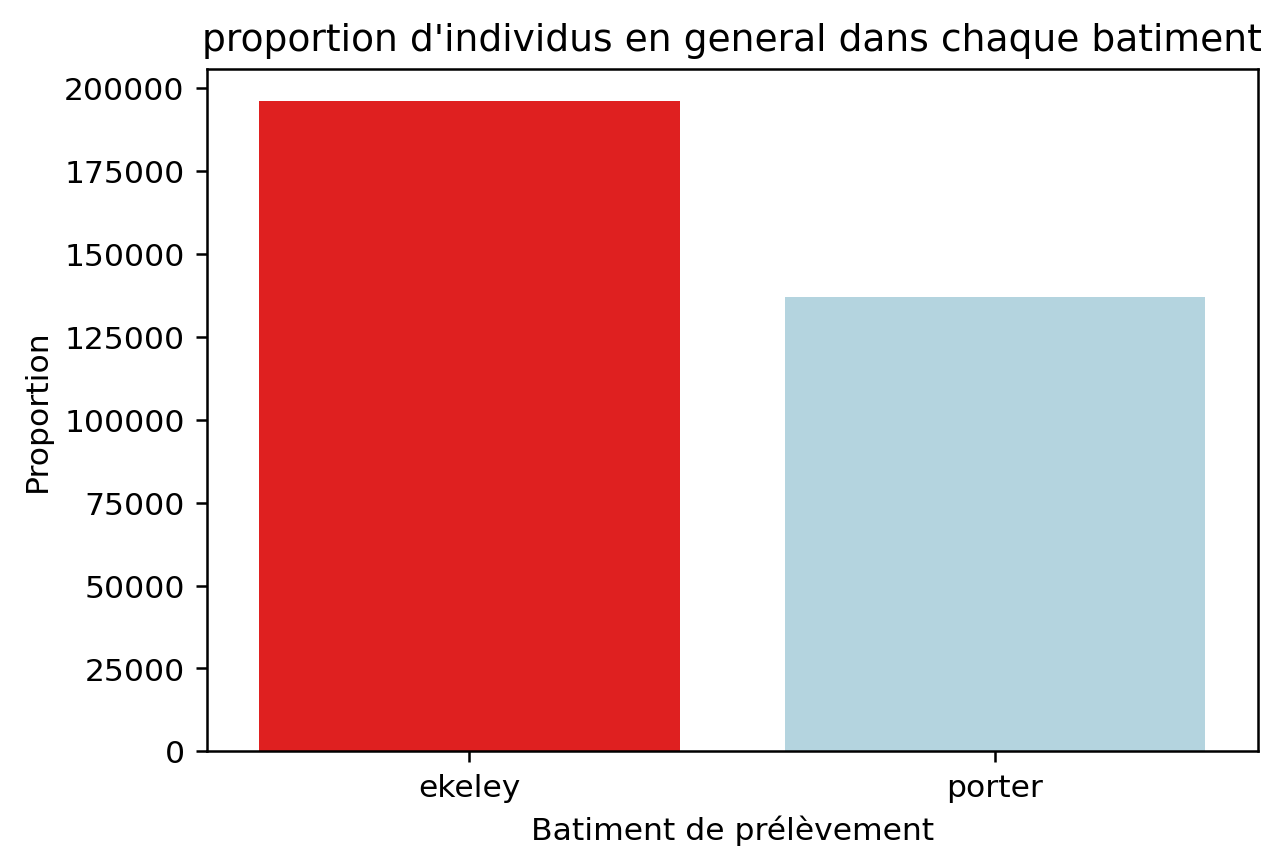

In [16]:
c = sns.barplot(x=list(dict_city.keys()),y=list(dict_city.values()),palette=['red','lightblue'])
c.set_xlabel("Batiment de prélèvement",fontsize=10)
c.set_ylabel("Proportion",fontsize=10)
plt.title("proportion d'individus en general dans chaque batiment")
plt

## Exploitation de l'information hiérarchique

In [101]:
#Create treemap for ekeley
con1 = sqlite3.connect(path)
cur1 = con1.cursor()
command1 = f"""
    SELECT t.phylum, s.building
    FROM Taxa t NATURAL JOIN Counts c, Samples s
    WHERE s.SAMPLE_ID = c.SAMPLE_ID AND s.Surface = 'faucet handles' AND s.building = 'ekeley'
"""
res1 = cur1.execute(command1)
result1 = res1.fetchall()
con1.commit()
con1.close()
result1

[('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('thermi', 'ekeley'),
 ('verrucomicrobia', 'ekeley'),
 ('verrucomicrobia', 'ekeley'),
 ('verrucomicrobia', 'ekeley'),
 ('verrucomicrobia', 'ekeley'),
 ('verrucomicrobia', 'ekeley'),
 ('verrucomicrobia', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ekeley'),
 ('acidobacteria', 'ek

In [108]:
def create_dict(result):
    dict_res = {}
    for item in result :
        if item[0] not in dict_res :
            dict_res[item[0]]=1
        else:
            dict_res[item[0]] += 1
    return dict_res

In [105]:
#Create treemap for ekeley
con2 = sqlite3.connect(path)
cur2 = con2.cursor()
command2 = f"""
    SELECT t.phylum, s.building
    FROM Taxa t NATURAL JOIN Counts c, Samples s
    WHERE s.SAMPLE_ID = c.SAMPLE_ID AND s.Surface = 'soap dispenser' AND s.building = 'porter'
"""
res2 = cur2.execute(command2)
result2 = res2.fetchall()
con2.commit()
con2.close()
result2

[('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('thermi', 'porter'),
 ('verrucomicrobia', 'porter'),
 ('verrucomicrobia', 'porter'),
 ('verrucomicrobia', 'porter'),
 ('verrucomicrobia', 'porter'),
 ('verrucomicrobia', 'porter'),
 ('verrucomicrobia', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'porter'),
 ('acidobacteria', 'po

In [187]:
%%bash
pip3 install squarify


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [109]:
dict_ek = create_dict(result1)
dict_port = create_dict(result2)

In [21]:
%pip install squarify

  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import squarify as sq

In [111]:
dict_glob['ekeley']
dict_ekeley = dict(sorted(dict_ek.items(), key=lambda x:x[1]))
dict_ekeley

{'zb2': 6,
 'lentisphaerae': 6,
 'brc1': 6,
 'sr1': 6,
 'sm2f11': 6,
 'ws3': 6,
 'chlorobi': 6,
 'wps-2': 6,
 'nitrospirae': 12,
 'op11': 12,
 'sc4': 12,
 'op10': 18,
 'spam': 18,
 'synergistetes': 30,
 'planctomycetes': 42,
 'spirochaetes': 42,
 'gemmatimonadetes': 90,
 'thermi': 156,
 'verrucomicrobia': 162,
 'fusobacteria': 174,
 'chloroflexi': 210,
 'tenericutes': 222,
 'tm7': 240,
 'cyanobacteria': 390,
 'acidobacteria': 858,
 'bacteroidetes': 3108,
 'actinobacteria': 4584,
 'firmicutes': 6978,
 'proteobacteria': 9396}

In [112]:
max(list(dict_glob['ekeley'].values()))

9396

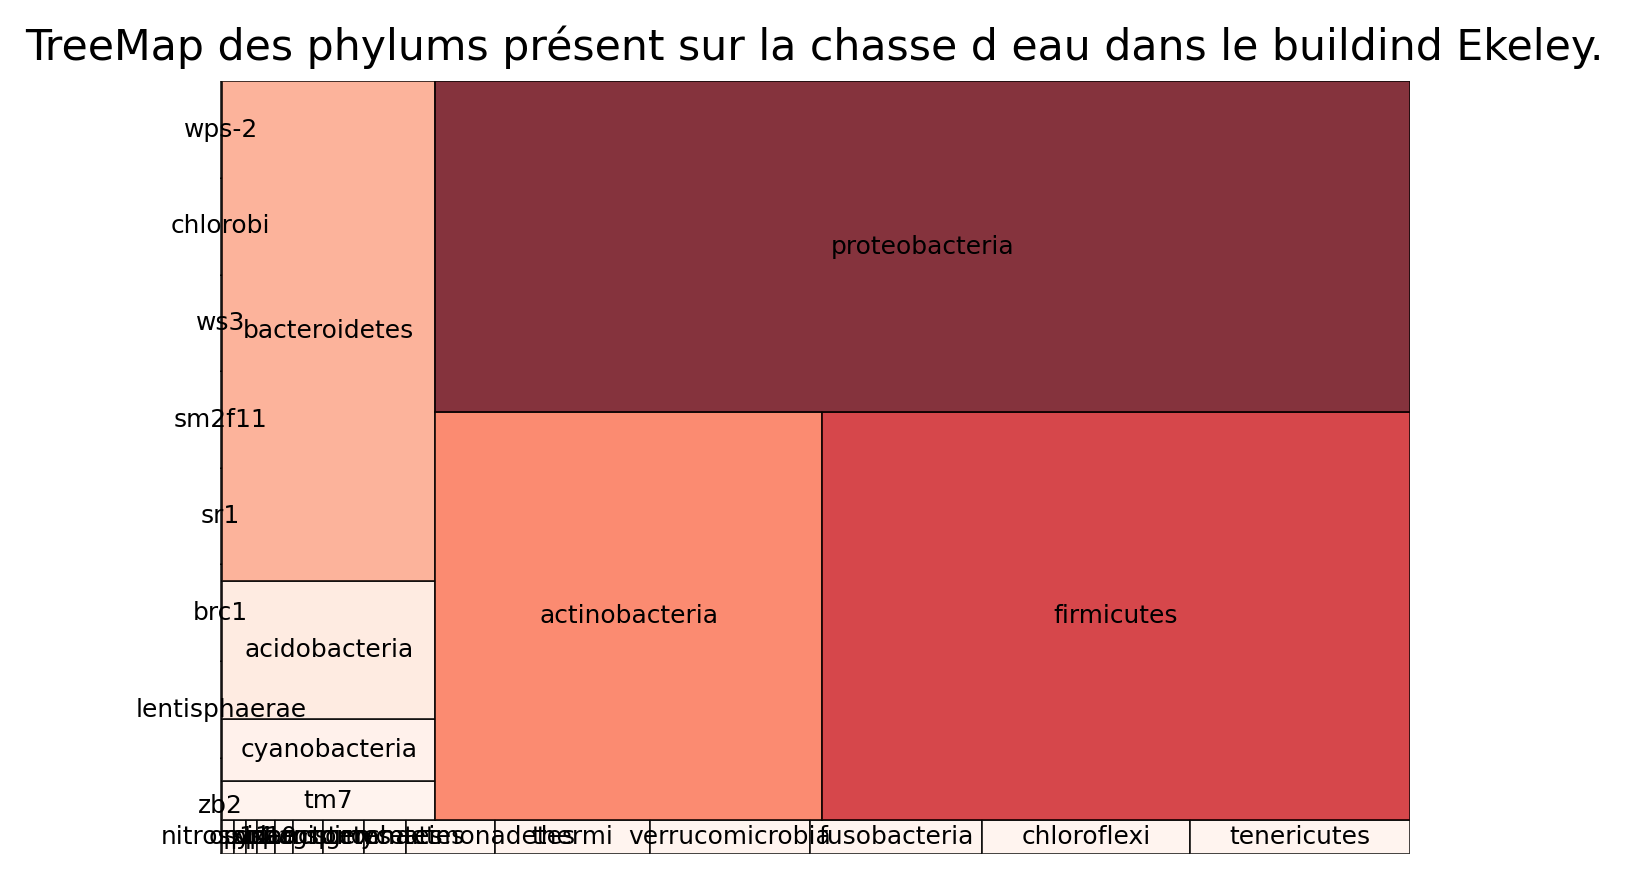

In [118]:
import matplotlib
df_ekeley = pd.DataFrame({'nb_phylum':[item/86130 for item in dict_ekeley.values()] ,
                          'phylum':list(dict_ekeley.keys())})

#colors
cmap = matplotlib.cm.Reds
mini=min([item/86130 for item in dict_ekeley.values()])
maxi=max([item/86130 for item in dict_ekeley.values()])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors1 = [cmap(norm(value)) for value in [item/86130 for item in dict_ekeley.values()]]

#TreeMap
sq.plot(sizes=df_ekeley['nb_phylum'],label=df_ekeley['phylum'],alpha=.8,text_kwargs={'fontsize':7},
       edgecolor="black", linewidth=0.5,color=colors1)

#Params du plot
plt.rcParams['figure.dpi']=256
plt.axis('off')
plt.title('TreeMap des phylums présent sur la chasse d eau dans le buildind Ekeley.')
plt.show()

In [114]:
dict_porter = dict(sorted(dict_port.items(), key=lambda x:x[1]))
dict_porter

{'zb2': 6,
 'lentisphaerae': 6,
 'brc1': 6,
 'sr1': 6,
 'sm2f11': 6,
 'ws3': 6,
 'chlorobi': 6,
 'wps-2': 6,
 'nitrospirae': 12,
 'op11': 12,
 'sc4': 12,
 'op10': 18,
 'spam': 18,
 'synergistetes': 30,
 'planctomycetes': 42,
 'spirochaetes': 42,
 'gemmatimonadetes': 90,
 'thermi': 156,
 'verrucomicrobia': 162,
 'fusobacteria': 174,
 'chloroflexi': 210,
 'tenericutes': 222,
 'tm7': 240,
 'cyanobacteria': 390,
 'acidobacteria': 858,
 'bacteroidetes': 3108,
 'actinobacteria': 4584,
 'firmicutes': 6978,
 'proteobacteria': 9396}

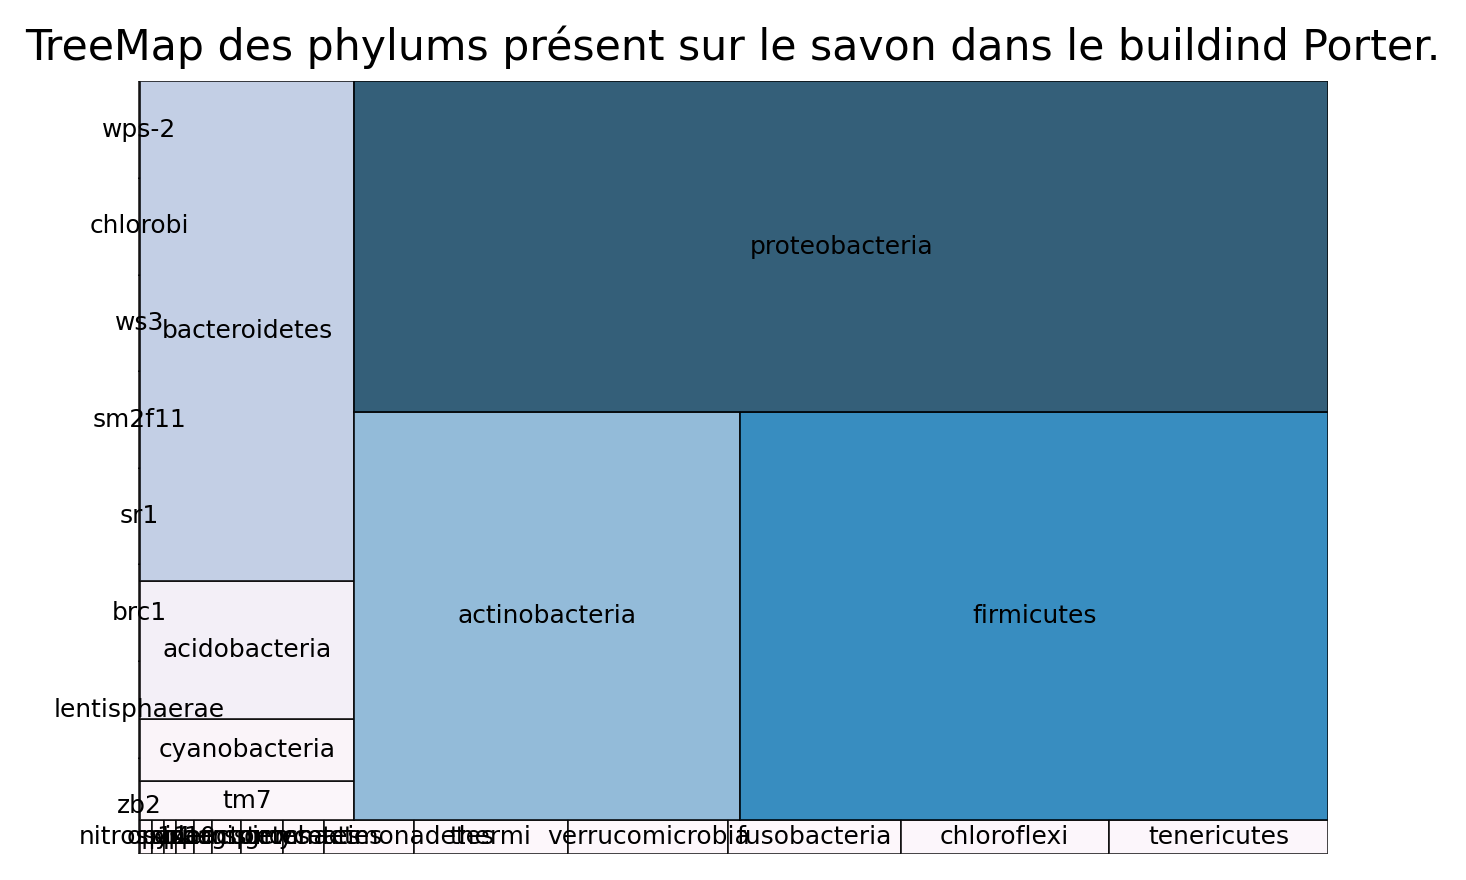

In [119]:
df_porter = pd.DataFrame({'nb_phylum':[item/86130 for item in dict_porter.values()] ,
                          'phylum':list(dict_porter.keys())})

#colors
cmap = matplotlib.cm.PuBu
mini=min([item/86130 for item in dict_porter.values()])
maxi=max([item/86130 for item in dict_porter.values()])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in [item/86130 for item in dict_porter.values()]]

#TreeMap
sq.plot(sizes=df_porter['nb_phylum'],label=df_porter['phylum'],alpha=.8,text_kwargs={'fontsize':7},
       edgecolor="black", linewidth=0.5,color=colors)

#Params du plot
plt.rcParams['figure.dpi']=256
plt.axis('off')
plt.title('TreeMap des phylums présent sur le savon dans le buildind Porter.')
plt.show()

## Tentative d'ACP

In [120]:
import sklearn

In [148]:
df = pd.read_csv('data/VDB_16S_dataset.txt',sep="\t")
labels = list(df['#OTU ID'])
df_np = df.to_numpy()[:,1:-1]
df_np

array([[3.0, 5.0, 7.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 43.0, 79.0, 83.0],
       [0.0, 0.0, 0.0, ..., 0.0, 10.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 17.0, 0.0]], dtype=object)

In [174]:
df.head()

#OTU ID  EKCM2.489495  EKBM8.489473  EKCF4.489498  PTBM9.489505  \
0   469478           3.0           5.0           7.0           3.0   
1   208196           0.0           0.0           0.0           0.0   
2   378462           0.0           0.0           0.0           0.0   
3   265971           0.0           0.0           0.0           0.0   
4   570812           0.0           0.0           0.0           0.0   

   EKBF10.489552  PTAM4.489517  EKCM1.489478  EKAM4.489564  EKCM7.489464  ...  \
0            0.0           0.0           0.0           0.0           0.0  ...   
1            1.0           0.0           0.0           0.0           0.0  ...   
2            0.0           2.0           2.0           8.0           2.0  ...   
3            1.0           0.0           0.0           0.0           0.0  ...   
4            0.0           0.0           0.0           0.0           2.0  ...   

   PTCF8.489486  EKCM9.489514  PTBF4.489483  PTBF1.489562  B6.489449  \
0           0.0           0.0           0.0           0.0        0.0   
1           0.0           0.0           0.0           0.0        0.0   
2           0.0           0.0           0.0           0.0        0.0   
3           0.0           0.0           0.0           0.0        0.0   
4           0.0           0.0           0.0           0.0        0.0   

   B5.489455  B1.489537  B3.489528  B2.489526  \
0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0   

                                    ConsensusLineage  
0  k__Bacteria; p__Firmicutes; c__Clostridia; o__...  
1  k__Bacteria; p__Proteobacteria; c__Alphaproteo...  
2  k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...  
3  k__Bacteria; p__Actinobacteria; c__Actinobacte...  
4  k__Bacteria; p__Proteobacteria; c__Alphaproteo...  

[5 rows x 111 columns]

In [150]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(df_np) 
Xnorm = SS.transform(df_np)

In [151]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca.fit(Xnorm)
pca.explained_variance_

array([48.39228088, 14.76848475,  6.82463212,  4.9411715 ,  3.92854891,
        3.04377976,  2.34215225,  1.95206492,  1.70629371,  1.47653239,
        1.28125029,  1.19429746,  1.01609091,  0.96316603,  0.95190012,
        0.86951536,  0.80057163,  0.7455086 ,  0.73016639,  0.67799401])

In [177]:
pca.explained_variance_ratio_

array([0.44386649, 0.13546035, 0.06259729, 0.0453217 , 0.03603366,
       0.02791833, 0.02148283, 0.01790484, 0.01565057, 0.01354314,
       0.01175196, 0.0109544 , 0.00931985, 0.00883441, 0.00873107,
       0.00797542, 0.00734305, 0.006838  , 0.00669727, 0.00621874])

In [190]:
0.44386649 > 1/math.sqrt(20)

True

In [201]:
import math
val = (1/math.sqrt(20))
for i in range(0,len(pca.explained_variance_ratio_)-1):
    print(float(pca.explained_variance_ratio_[i]) > float(val)-0.1)

True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [207]:
#Create treemap for ekeley
conX = sqlite3.connect(path)
curX = conX.cursor()
commandX = f"""
    SELECT *
    FROM Samples s
    WHERE s.SAMPLE_ID = 'EKCM2.489495' 
"""
resX = curX.execute(commandX)
resultX = resX.fetchall()
conX.commit()
conX.close()
resultX

[('EKCM2.489495', 'male', 'c', 'ekeley', 'door out')]

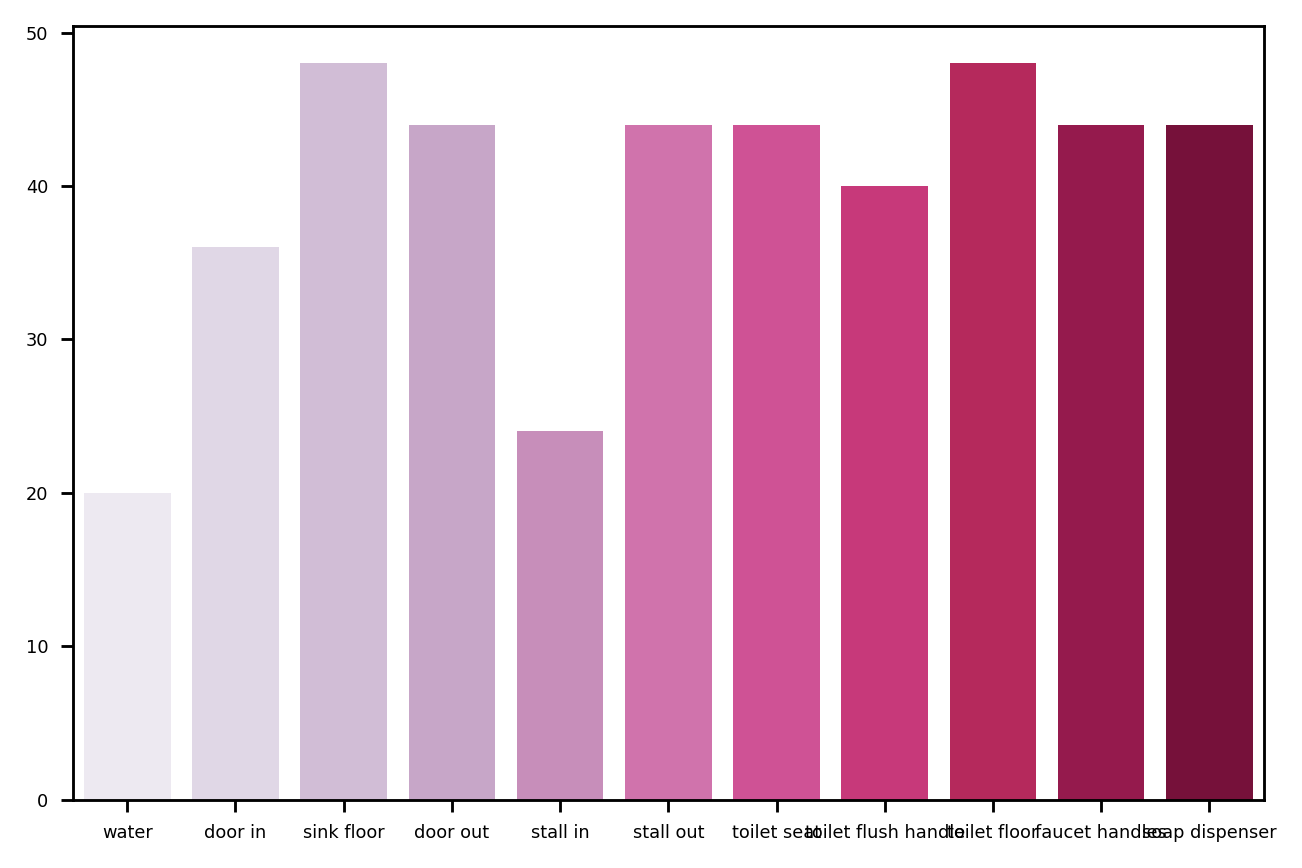

In [231]:

#Create treemap for ekeley
conX = sqlite3.connect(path)
curX = conX.cursor()
commandX = f"""
    SELECT s.Surface
    FROM Samples s NATURAL JOIN Counts c
    WHERE c.OTU_ID IN ('368907','60254','568913','484436')
"""
resX = curX.execute(commandX)
resultX = resX.fetchall()
conX.commit()
conX.close()

dict_hist={}
for item in resultX :
    if item[0] not in dict_hist :
        dict_hist[item[0]]=1
    else :
        dict_hist[item[0]]+=1
c = sns.barplot(x=list(dict_hist.keys()),y=list(dict_hist.values()),palette='PuRd')
c.set_xlabel('',fontsize=5)
c.tick_params(labelsize=5)
plt.show()

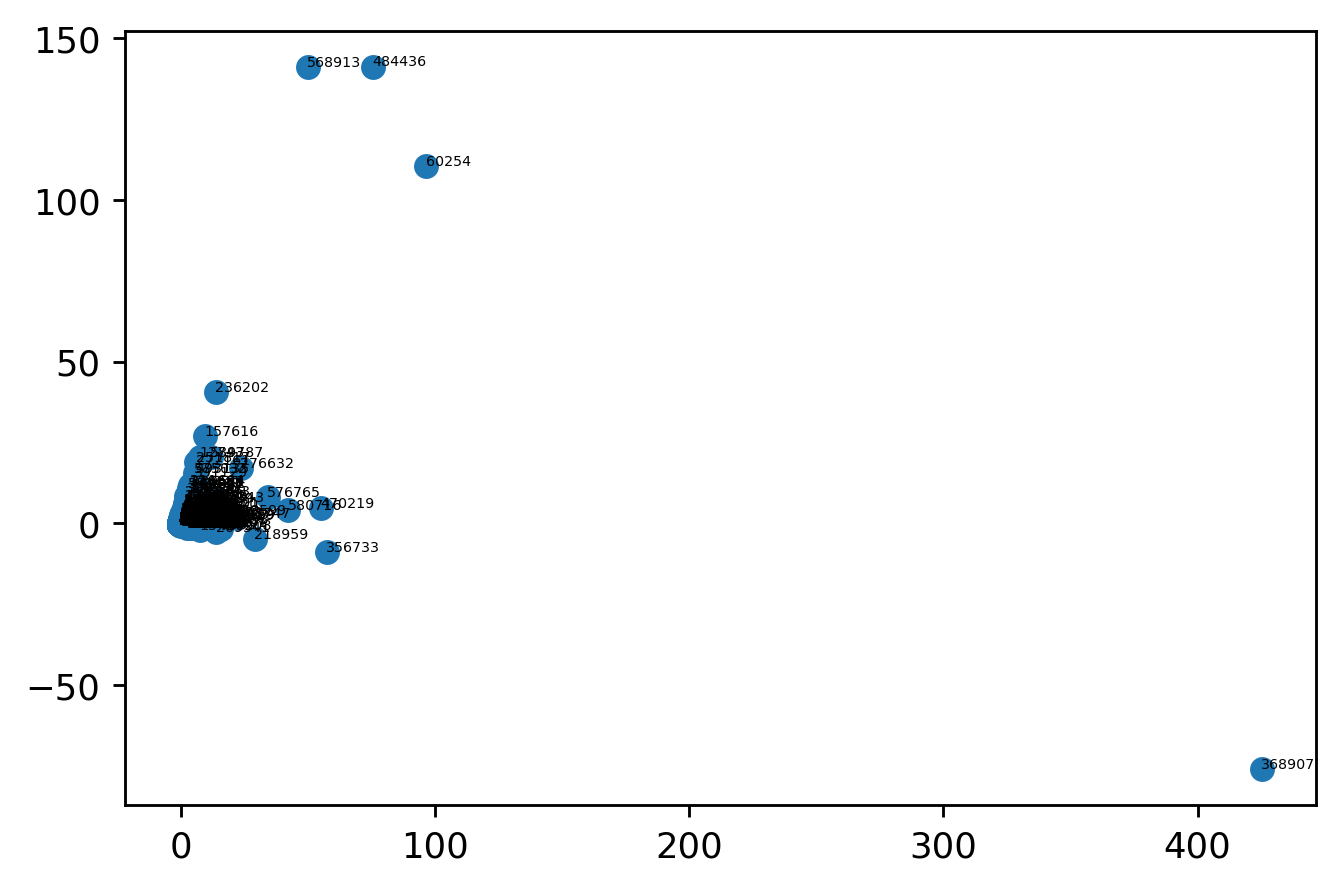

In [209]:
X_pca = pca.transform(Xnorm)
plt.scatter(X_pca[:, 0], X_pca[:, 1],cmap='viridis')
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points',size=4)
plt.show()

In [169]:
('368907','60254','568913','484436')

array([-0.36319504, -0.29210576, -0.63073448, ..., -0.35585094,
       -0.32481021, -0.32544275])